In [1]:
# For data collection
import xarray as xr
import numpy as np
# For visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as colors
import matplotlib.dates as dates

In [2]:
file_path = '/home/exf512/gdp_v2.00.nc'
ds = xr.open_dataset(file_path)

In [3]:
time_bin = ds.time.astype('float')/(1e9*3600*24*365) - 17.75 + 1988 # in years

In [4]:
ds_sst = ds.time.where(ds.flg_sst==5).astype('float')/(1e9*3600*24*365) - 17.75 + 1988 # years 

In [56]:
ds_sst 

<xarray.DataArray 'time' (obs: 165754333)>
array([2012.4826484 , 2012.48276256, 2012.48287671, ..., 1677.77879132,
       1677.77879132, 1677.77879132])
Coordinates:
    longitude  (obs) float32 -17.74 -17.75 -17.74 ... -30.27 -30.32 -30.37
    latitude   (obs) float32 14.75 14.76 14.77 14.78 ... 66.82 66.82 66.81 66.8
    time       (obs) datetime64[ns] 2012-03-15T22:00:00 ... 1999-10-26T14:00:00
    ids        (obs) int64 101143 101143 101143 ... 9929870 9929870 9929870
Dimensions without coordinates: obs

In [57]:
print(time_bin.max())
print(time_bin.min())

<xarray.DataArray 'time' ()>
array(2020.78139269)
<xarray.DataArray 'time' ()>
array(1988.01312785)


In [5]:
bins = np.arange(1988.01,2020.78, 0.027) # bin every 10 days 

In [6]:
hist_sst, bin_edges_sst = np.histogram(ds_sst,bins=bins)

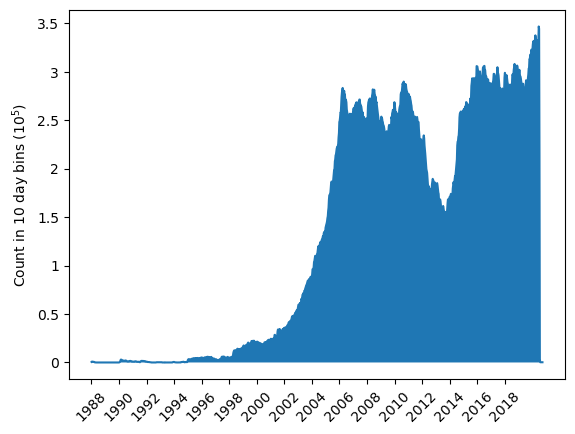

In [63]:
fig = plt.figure()
ax = fig.add_subplot()
xticks = np.arange(1988, 2020, 2)
plt.plot(bin_edges_sst[0:-1],hist_sst)
plt.xticks(xticks, rotation = 45)
scale_y = 1e5
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y)) # scale y-axis
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel("Count in 10 day bins (10$^5$)")
ax.set_xlabel("")
ax.fill_between(x = bins[0:-1], y1 = hist_sst)

Pos+Velo:

In [7]:
ds_vn = ds.time.where(ds.vn.isnull() == False).astype('float')/(1e9*3600*24*365) - 17.75 + 1988 # years

In [8]:
hist_vn, bin_edges_vn = np.histogram(ds_vn, bins=bins)

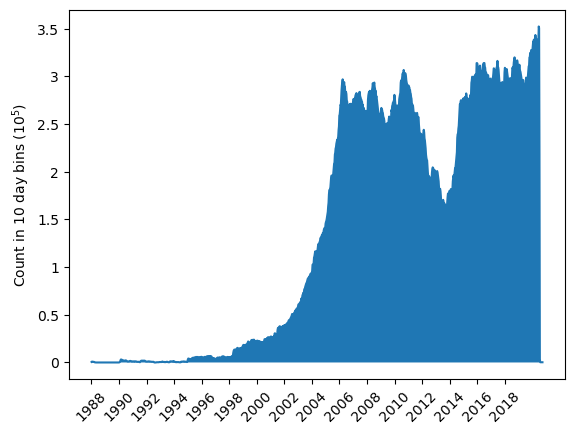

In [68]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(bin_edges_vn[0:-1],hist_vn)
scale_y = 1e5
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y)) # scale y-axis
ax.yaxis.set_major_formatter(ticks_y)
plt.xticks(xticks, rotation = 45)
ax.set_ylabel("Count in 10 day bins (10$^5$)")
ax.set_xlabel("")
ax.fill_between(x = bins[0:-1], y1 = hist_vn)

SST2:

In [9]:
ds_sst2 = ds.time.where(ds.flg_sst2 ==5).astype('float')/(1e9*3600*24*365) - 17.75 + 1988 # time in hours

In [10]:
hist_sst2, bin_edges_sst2 = np.histogram(ds_sst2, bins=bins)

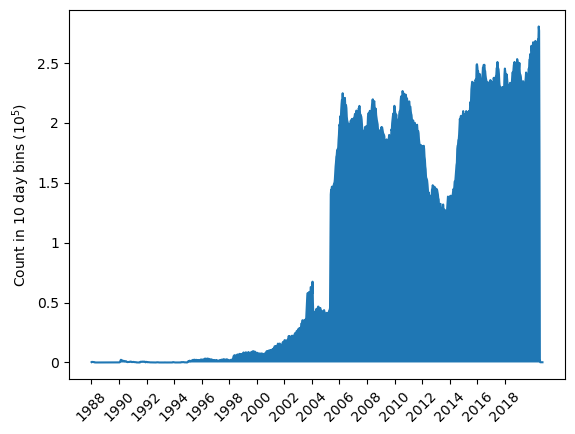

In [71]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(bin_edges_sst2[0:-1],hist_sst2)
scale_y = 1e5
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y)) # scale y-axis
plt.xticks(xticks, rotation = 45)
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel("Count in 10 day bins (10$^5$)")
ax.set_xlabel("")
ax.fill_between(x = bins[0:-1], y1 = hist_sst2)

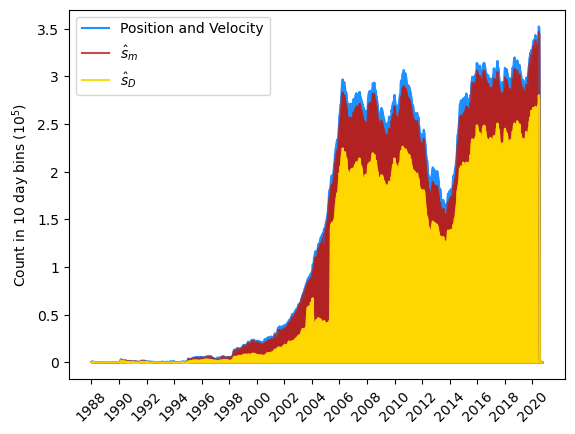

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
xticks = np.arange(1988, 2022, 2)
plt.plot(bin_edges_vn[0:-1],hist_vn, color = "dodgerblue", label = "Position and Velocity")
plt.plot(bin_edges_sst[0:-1],hist_sst, color = "firebrick", alpha = 0.8, label = "$\hat{s}$$_{m}$")
plt.plot(bin_edges_sst2[0:-1],hist_sst2, color = "gold", alpha = 0.95, label = "$\hat{s}$$_{D}$")
scale_y = 1e5
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y)) # scale y-axis
ax.yaxis.set_major_formatter(ticks_y)
plt.legend(loc='upper left')
ax.set_ylabel("Count in 10 day bins (10$^5$)")
ax.set_xlabel("")
ax.fill_between(x = bins[0:-1], y1 = hist_vn, color = 'dodgerblue')
ax.fill_between(x = bins[0:-1], y1 = hist_sst, color = 'firebrick')
ax.fill_between(x = bins[0:-1], y1 = hist_sst2, color = 'gold')
plt.xticks(xticks, rotation = 45)
plt.savefig('density_histogram.pdf')


In [6]:
time_bin_days = time_bin / (24)

In [7]:
bins_days = np.arange(time_bin_hours.min(), time_bin_hours.max(), 10) # 10 days

In [9]:
ds_sst2 = ds.time.where(ds.flg_sst2 ==5).astype('float')/(1.e9*3600) # time in hours

In [11]:
ds_sst2_days = ds_sst2 / (24)

In [12]:
hist_sst2_days, bin_edges_sst2_days = np.histogram(ds_sst2_days, bins=bins_days)

Text(0.5, 0, '')

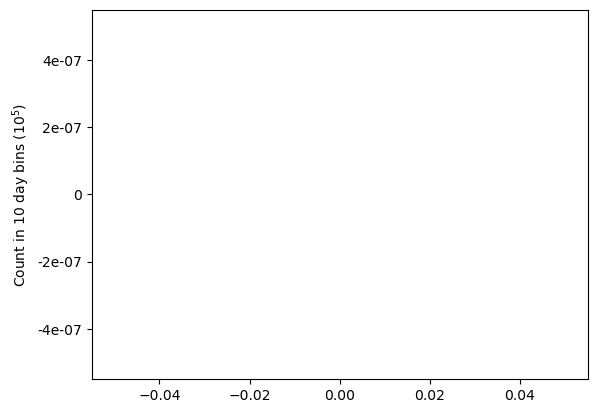

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
#width_D = bins_days[1]-bins_days[0]
plt.plot(bin_edges_sst2_days[0:-1],hist_sst2_days)
scale_y = 1e5
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y)) # scale y-axis
ax.yaxis.set_major_formatter(ticks_y)
ax.set_ylabel("Count in 10 day bins (10$^5$)")
ax.set_xlabel("")